In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


# Data đã xử lý

In [3]:
df_april = pd.read_csv('/kaggle/input/clean-aws-month/final_data/filled_data_april.csv')
df_october = pd.read_csv('/kaggle/input/clean-aws-month/final_data/filled_data_october.csv')

In [4]:
df_april.head()

,datetime,row,col,AWS,CAPE,EWSS,IE,ISOR,KX,PEV,...,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,WVB
0,2019-04-01 00:00:00,0,114,0.0,446.125,-641.113281,-0.000014,0.588248,37.360176,-0.000016,...,253.877518,261.638123,281.487091,260.333344,285.000702,269.992981,281.766937,286.364563,285.240051,244.275345
1,2019-04-01 02:00:00,0,114,9.2,519.750,-201.390625,-0.000037,0.588248,36.553154,-0.000070,...,250.888718,253.995895,261.295807,247.252029,262.435974,255.327316,261.579437,283.843597,262.818237,243.474976
2,2019-04-01 03:00:00,0,114,7.4,447.500,-80.894531,-0.000043,0.588248,34.931915,-0.000094,...,251.353149,255.523193,268.688995,252.243011,269.938660,259.248505,268.137817,288.332275,269.414612,243.472137
3,2019-04-01 04:00:00,0,114,0.0,421.500,-33.917969,-0.000043,0.588248,32.517395,-0.000102,...,253.576904,259.337555,277.587189,257.868683,279.395111,265.641571,276.697174,303.794434,280.188019,244.486572
4,2019-04-01 05:00:00,0,114,0.0,435.625,11.640625,-0.000039,0.588248,31.718704,-0.000118,...,252.470215,256.889984,267.289856,251.395325,268.833862,260.088013,267.634430,295.567719,269.526978,244.371689


# Feature đã chọn dựa trên phương án 1
- T4:  CAPE, KX, R500, R850, TCLW, TCW, U250, U850, V250, V850, B10B, B11B, B14B, I2B, I4B, IRB, WVB
- T10:  EWSS, KX, PEV, R250, R500, R850, SSHF, TCLW, TCW, U250, U850, V250, V850, B11B,  B14B, I4B, IRB

In [5]:
features_april = ['CAPE', 'KX', 'R500', 'R850', 'TCLW', 'TCW', 'U250', 'U850', 'V250', 'V850', 'B10B', 'B11B', 'B14B', 'I2B', 'I4B', 'IRB', 'WVB']
features_october = ['EWSS', 'KX', 'PEV', 'R250', 'R500', 'R850', 'SSHF', 'TCLW', 'TCW', 'U250', 'U850', 'V250', 'V850', 'B11B', 'B14B', 'I4B', 'IRB']

# Chia train test theo thời gian

In [6]:
def check_missing_hours(df, month):
    df['datetime'] = pd.to_datetime(df['datetime']) 
    df = df[df['datetime'].dt.month == month].copy()

    all_dates = df['datetime'].dt.date.unique()
    all_expected_hours = []
    for date in all_dates:
        hours = pd.date_range(f"{date} 00:00:00", f"{date} 23:00:00", freq="H")
        all_expected_hours.extend(hours)
    
    expected_df = pd.DataFrame(all_expected_hours, columns=["datetime"])
    missing_times = expected_df[~expected_df['datetime'].isin(df['datetime'])]
    return missing_times

missing_april = check_missing_hours(df_april, 4)
missing_october = check_missing_hours(df_october, 10)

print("T4:")
print(missing_april['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S').to_string(index=False))

print("T10:")
print(missing_october['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S').to_string(index=False))


T4:
2020-04-06 04:00:00
2020-04-13 05:00:00
T10:
2019-10-07 11:00:00
2019-10-07 12:00:00
2019-10-07 13:00:00
2019-10-07 14:00:00
2019-10-07 16:00:00
2019-10-08 20:00:00
2019-10-08 21:00:00
2019-10-08 22:00:00
2019-10-08 23:00:00
2019-10-09 00:00:00
2019-10-09 01:00:00
2019-10-09 02:00:00
2019-10-09 18:00:00
2019-10-09 19:00:00
2019-10-09 20:00:00
2019-10-09 21:00:00
2019-10-09 22:00:00
2019-10-09 23:00:00
2019-10-10 00:00:00
2019-10-10 03:00:00
2019-10-10 04:00:00
2019-10-10 05:00:00
2019-10-10 06:00:00
2019-10-10 07:00:00
2019-10-15 13:00:00
2019-10-15 16:00:00
2019-10-15 18:00:00
2019-10-15 19:00:00
2019-10-15 20:00:00
2019-10-15 21:00:00
2019-10-16 02:00:00
2019-10-16 03:00:00
2019-10-16 04:00:00
2019-10-16 05:00:00
2019-10-16 18:00:00
2019-10-16 20:00:00
2019-10-16 21:00:00
2019-10-16 22:00:00
2019-10-16 23:00:00
2019-10-17 00:00:00
2019-10-17 01:00:00
2019-10-17 18:00:00
2019-10-17 19:00:00
2019-10-17 20:00:00
2019-10-17 21:00:00
2019-10-17 22:00:00
2019-10-17 23:00:00
2019-10-18 

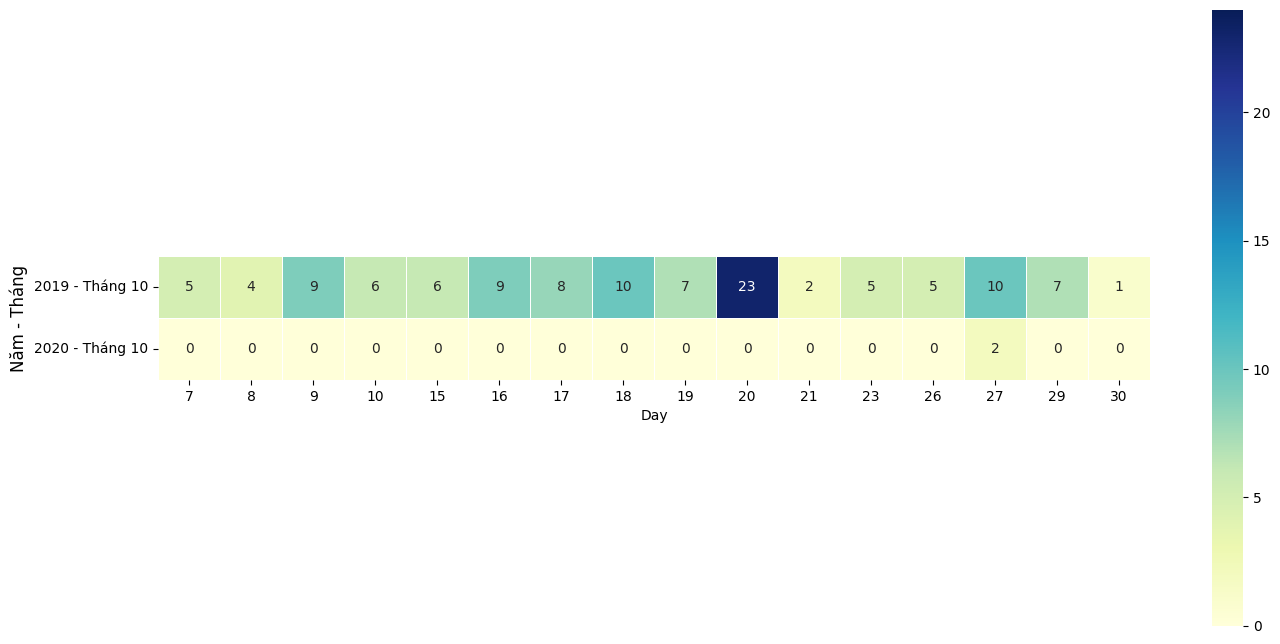

In [7]:
def create_missing_hours_heatmap(missing_times, month_name):
    missing_times['Year'] = missing_times['datetime'].dt.year
    missing_times['Month'] = missing_times['datetime'].dt.month
    missing_times['Day'] = missing_times['datetime'].dt.day
    missing_times['Hour'] = missing_times['datetime'].dt.hour
    
    missing_counts = missing_times.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Missing_Hours')

    pivot_data = missing_counts.pivot_table(
        index=['Year', 'Month'], columns='Day', values='Missing_Hours', fill_value=0
    )
    
    pivot_data.index = [f'{year} - Tháng {month}' for year, month in pivot_data.index]

    plt.figure(figsize=(16, 8))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, square=True, vmin=0, vmax=24)
    plt.ylabel('Năm - Tháng', fontsize=12)
    plt.show()

create_missing_hours_heatmap(missing_october, "Tháng 10")

- Tháng 4 thiếu giờ ở ngày 2020-04-06 và 2020-04-13
- Tháng 10 thiếu giờ chủ yếu ở năm 2019 trong ngày 7,8,9,19,15-21,23,26,27,29,30

  => quyết định chia tập train từ 4/4/2019 đến 28/4/2019 và 4/4/2020 đến 28/4/2020, tập test là những ngày còn lại
 -  tương tự cho tháng 10

In [8]:
def split_data_by_multiple_ranges(df, train_ranges):
    train_mask = False
    for start, end in train_ranges:
        train_mask |= (df['datetime'] >= start) & (df['datetime'] < end)
    train_df = df[train_mask]
    test_df = df[~train_mask]
    return train_df, test_df

def convert_rain_label(df):
    df['AWS'] = df['AWS'].apply(lambda x: 1 if x > 0 else 0)
    return df

df_april = convert_rain_label(df_april)
df_october = convert_rain_label(df_october)

train_ranges_april = [("2019-04-04", "2019-04-29"), ("2020-04-04", "2020-04-29")]
train_ranges_october = [("2019-10-04", "2019-10-29"), ("2020-10-04", "2020-10-29")]

train_april, test_april = split_data_by_multiple_ranges(df_april, train_ranges_april)
train_october, test_october = split_data_by_multiple_ranges(df_october, train_ranges_october)

print(f"Tháng 4 - Train: {train_april.shape}")
print(f"Tháng 4 - Test: {test_april.shape}")
print(f"Tháng 10 - Train: {train_october.shape}")
print(f"Tháng 10 - Test: {test_october.shape}")


Tháng 4 - Train: (253767, 33)
Tháng 4 - Test: (52079, 33)
Tháng 10 - Train: (281128, 33)
Tháng 10 - Test: (70692, 33)


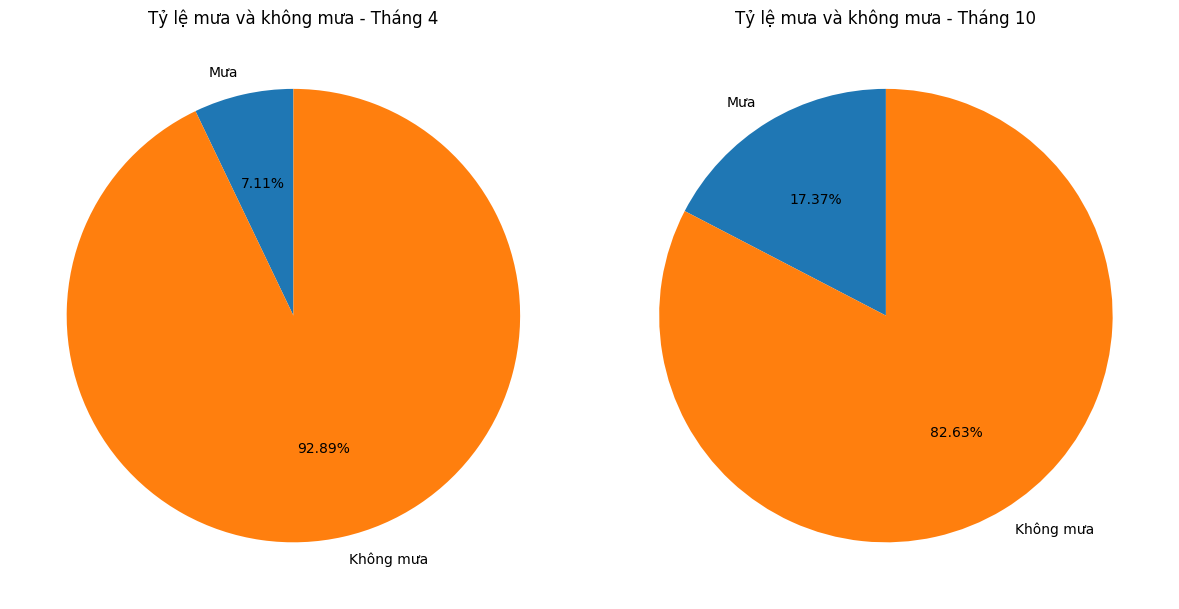

In [9]:
rain_april = train_april[train_april['AWS'] == 1].shape[0]
no_rain_april = train_april[train_april['AWS'] == 0].shape[0]
total_april = train_april.shape[0]
rain_ratio_april = rain_april / total_april
no_rain_ratio_april = no_rain_april / total_april

rain_october = train_october[train_october['AWS'] == 1].shape[0]
no_rain_october = train_october[train_october['AWS'] == 0].shape[0]
total_october = train_october.shape[0]
rain_ratio_october = rain_october / total_october
no_rain_ratio_october = no_rain_october / total_october

labels = ['Mưa', 'Không mưa']
rain_data_april = [rain_ratio_april, no_rain_ratio_april]
rain_data_october = [rain_ratio_october, no_rain_ratio_october]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(rain_data_april, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[0].set_title(f"Tỷ lệ mưa và không mưa - Tháng 4")

axes[1].pie(rain_data_october, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[1].set_title(f"Tỷ lệ mưa và không mưa - Tháng 10")

plt.tight_layout()
plt.show()

# Min-max normalization

In [10]:
train_april.shape[1]

33

In [11]:
X_train_april = train_april[features_april]
y_train_april = train_april['AWS']

X_test_april = test_april[features_april]
y_test_april = test_april['AWS']

X_train_october = train_october[features_october]
y_train_october = train_october['AWS']

X_test_october = test_october[features_october]
y_test_october = test_october['AWS']

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_april = MinMaxScaler()
X_train_april_scaled = scaler_april.fit_transform(X_train_april)
X_test_april_scaled = scaler_april.transform(X_test_april)

scaler_october = MinMaxScaler()
X_train_october_scaled = scaler_october.fit_transform(X_train_october)
X_test_october_scaled = scaler_october.transform(X_test_october)

In [13]:
X_train_april_scaled = pd.DataFrame(X_train_april_scaled, columns=X_train_april.columns)
X_test_april_scaled = pd.DataFrame(X_test_april_scaled, columns=X_test_april.columns)

X_train_october_scaled = pd.DataFrame(X_train_october_scaled, columns=X_train_october.columns)
X_test_october_scaled = pd.DataFrame(X_test_october_scaled, columns=X_test_october.columns)

# Train lúc chưa cân bằng

In [14]:
def train_and_evaluate_multiple_models(models_info, model_class, **model_params):
    trained_models = {}
    predictions = {}
    
    for name, X_train, y_train, X_test, y_test in models_info:
        print(f"\n{name}...")
        
        # Khởi tạo mô hình với các tham số đầu vào
        model = model_class(**model_params)
        model.fit(X_train, y_train)
        trained_models[name] = model
        
        # Dự đoán trên tập test
        predictions[name] = model.predict(X_test)

    # Đánh giá mô hình
    for name, X_train, y_train, X_test, y_test in models_info:
        print(f"\n{name}:")
        y_pred = predictions[name]
        
        # In classification report
        print(classification_report(y_test, y_pred, target_names=['No Rain', 'Rain']))
        
        # Hiển thị confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Rain', 'Rain'])
        cm_display.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix - {name}")
        plt.show()

In [15]:
models_info = [
    ("Tháng 4", X_train_april_scaled, y_train_april, X_test_april_scaled, y_test_april),
    ("Tháng 10", X_train_october_scaled, y_train_october, X_test_october_scaled, y_test_october)
]

## SCG

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


=== Dataset: Tháng 4 ===
 hidden_dim=10  → val loss = 0.695595
 hidden_dim=20  → val loss = 0.679766
 hidden_dim=50  → val loss = 0.695351
 hidden_dim=100 → val loss = 0.691437
 hidden_dim=150 → val loss = 0.701522
 hidden_dim=17  → val loss = 0.682571
 hidden_dim=25  → val loss = 0.690463
 hidden_dim=34  → val loss = 0.691808
 hidden_dim=50  → val loss = 0.683866
 hidden_dim=68  → val loss = 0.694592
 hidden_dim=85  → val loss = 0.688700
⇒ Best hidden_dim = 20, validation loss = 0.679766
Test classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     46790
           1       0.10      1.00      0.18      5289

    accuracy                           0.10     52079
   macro avg       0.05      0.50      0.09     52079
weighted avg       0.01      0.10      0.02     52079

Test confusion matrix:
 [[    0 46790]
 [    0  5289]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


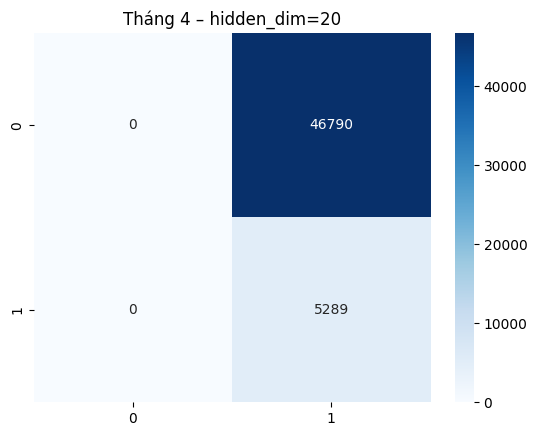


=== Dataset: Tháng 10 ===
 hidden_dim=10  → val loss = 0.691413
 hidden_dim=20  → val loss = 0.691777
 hidden_dim=50  → val loss = 0.697270
 hidden_dim=100 → val loss = 0.699164
 hidden_dim=150 → val loss = 0.688558
 hidden_dim=17  → val loss = 0.701101
 hidden_dim=25  → val loss = 0.701140
 hidden_dim=34  → val loss = 0.690592
 hidden_dim=50  → val loss = 0.694675
 hidden_dim=68  → val loss = 0.688614
 hidden_dim=85  → val loss = 0.697434
⇒ Best hidden_dim = 150, validation loss = 0.688558
Test classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57109
           1       0.19      1.00      0.32     13583

    accuracy                           0.19     70692
   macro avg       0.10      0.50      0.16     70692
weighted avg       0.04      0.19      0.06     70692

Test confusion matrix:
 [[    0 57109]
 [    0 13583]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


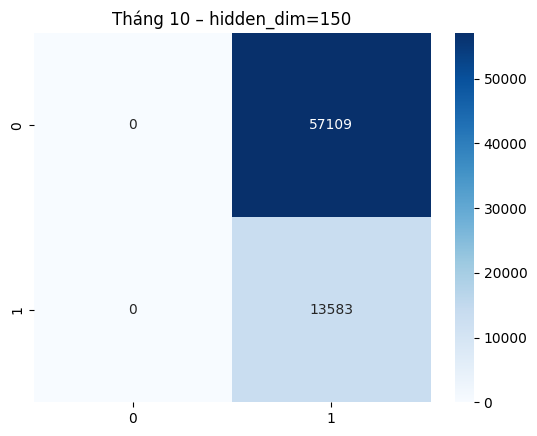

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# ——— Utility functions ———
def softmax(Z):
    # Ensure Z is a numpy array of shape (n_samples, n_classes)
    Z_arr = Z.values if hasattr(Z, "values") else np.array(Z)
    # 1) subtract the max for numerical stability
    #    max_per_row: shape (n_samples,)
    max_per_row = np.max(Z_arr, axis=1)
    #    reshape to (n_samples, 1) so broadcasting works
    max_per_row = max_per_row.reshape(-1, 1)
    # 2) exponentiate
    expZ = np.exp(Z_arr - max_per_row)
    # 3) sum per row, then reshape to (n_samples, 1)
    sum_per_row = np.sum(expZ, axis=1).reshape(-1, 1)
    # 4) divide
    return expZ / sum_per_row

def pack(W1, b1, W2, b2):
    """
    Flatten and concatenate parameters, handling pandas DataFrame/Series inputs.
    """
    # Convert DataFrame/Series to numpy arrays
    W1_arr = W1.values if isinstance(W1, pd.DataFrame) else np.array(W1)
    b1_arr = b1.values if isinstance(b1, (pd.Series, pd.DataFrame)) else np.array(b1)
    W2_arr = W2.values if isinstance(W2, pd.DataFrame) else np.array(W2)
    b2_arr = b2.values if isinstance(b2, (pd.Series, pd.DataFrame)) else np.array(b2)
    # Flatten and concatenate
    return np.hstack([
        W1_arr.ravel(),
        b1_arr.ravel(),
        W2_arr.ravel(),
        b2_arr.ravel()
    ])

def unpack(p, input_dim, hidden_dim, output_dim):
    idx = 0
    W1 = p[idx:idx + hidden_dim*input_dim].reshape(hidden_dim, input_dim)
    idx += hidden_dim*input_dim
    b1 = p[idx:idx + hidden_dim]
    idx += hidden_dim
    W2 = p[idx:idx + output_dim*hidden_dim].reshape(output_dim, hidden_dim)
    idx += output_dim*hidden_dim
    b2 = p[idx:idx + output_dim]
    return W1, b1, W2, b2

def trainscg(loss_grad_func, x0, epochs=8, **lg_kwargs):
    sigma0, lambd = 1e-6, 1e-6
    x = x0.copy()
    f, g = loss_grad_func(x, **lg_kwargs)
    d = -g
    errors = [f]
    for epoch in range(epochs):
        mu = d.dot(d)
        sigma = sigma0 / np.sqrt(mu) if mu > 0 else sigma0
        _, g1 = loss_grad_func(x + sigma*d, **lg_kwargs)
        s = (g1 - g) / sigma
        delta = d.dot(s)
        if delta <= 0:
            delta = lambd * mu
            lambd -= delta / mu
        alpha = -d.dot(g) / (delta + lambd*mu)
        x_new = x + alpha*d
        f_new, g_new = loss_grad_func(x_new, **lg_kwargs)
        Delta = 2*(f - f_new) / (alpha * d.dot(g))
        if Delta >= 0:
            x, f, g = x_new, f_new, g_new
            lambd *= max(1/3, 1 - (2*Delta - 1)**3)
            beta = (g.dot(g) - g.dot(g_new)) / (d.dot(g))
            d = -g + beta*d
        else:
            lambd += mu * (1 - Delta)
        errors.append(f)
    return x, errors

def loss_grad_factory(X, Y_oh, input_dim, hidden_dim, output_dim):
    def loss_and_grad(p):
        W1, b1, W2, b2 = unpack(p, input_dim, hidden_dim, output_dim)
        m = X.shape[0]
        Z1 = X.dot(W1.T) + b1
        A1 = np.tanh(Z1)
        Z2 = A1.dot(W2.T) + b2
        A2 = softmax(Z2)
        loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
        dZ2 = (A2 - Y_oh) / m
        dW2 = dZ2.T.dot(A1)
        db2 = dZ2.sum(axis=0)
        dA1 = dZ2.dot(W2)
        dZ1 = dA1 * (1 - np.tanh(Z1)**2)
        dW1 = dZ1.T.dot(X)
        db1 = dZ1.sum(axis=0)
        return loss, pack(dW1, db1, dW2, db2)
    return loss_and_grad

param_grid = {'hidden_dim': [10, 20, 50, 100, 150, 17, 25, 34, 50, 68, 85]}

for name, X_trval, y_trval, X_test, y_test in models_info:
    print(f"\n=== Dataset: {name} ===")
    # split train+val from test
    X_train, X_val, y_train, y_val = train_test_split(
        X_trval, y_trval, test_size=0.2, random_state=42
    )
    # one-hot encode y_train
    y_arr = y_train.to_numpy().reshape(-1, 1)
    encoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train_oh = encoder.fit_transform(y_arr.reshape(-1,1))
    y_arv = y_val.to_numpy().reshape(-1, 1)
    Y_val_oh   = encoder.transform(y_arv.reshape(-1,1))
    # final test encoding not needed for training
    
    # scale assumed done before, X_trval and X_test are already scaled
    
    input_dim  = X_train.shape[1]
    output_dim = Y_train_oh.shape[1]

    best_h, best_loss = None, np.inf
    for h in param_grid['hidden_dim']:
        # init params
        param_size  = h*input_dim + h + output_dim*h + output_dim
        init_p = 0.01 * np.random.randn(param_size)
        # train SCG
        lg = loss_grad_factory(X_train, Y_train_oh, input_dim, h, output_dim)
        opt_p, _ = trainscg(lg, init_p, epochs=8)
        # predict on val
        W1, b1, W2, b2 = unpack(opt_p, input_dim, h, output_dim)
        Z1_val = X_val.dot(W1.T) + b1
        A1_val = np.tanh(Z1_val)
        Z2_val = A1_val.dot(W2.T) + b2
        A2_val = softmax(Z2_val)
        val_loss = -np.mean(np.sum(Y_val_oh * np.log(A2_val + 1e-12), axis=1))
        print(f" hidden_dim={h:<3} → val loss = {val_loss:.6f}")
        if val_loss < best_loss:
            best_loss, best_h = val_loss, h
    
    print(f"⇒ Best hidden_dim = {best_h}, validation loss = {best_loss:.6f}")

    X_full = np.vstack([X_train, X_val])
    y_full = np.hstack([y_train, y_val])
    Y_full_oh = encoder.fit_transform(y_full.reshape(-1,1))
    param_size  = best_h*input_dim + best_h + output_dim*best_h + output_dim
    init_p_full = 0.01 * np.random.randn(param_size)
    lg_full = loss_grad_factory(X_full, Y_full_oh, input_dim, best_h, output_dim)
    opt_p_full, loss_hist = trainscg(lg_full, init_p_full, epochs=8)
    
    # evaluate on test
    W1f, b1f, W2f, b2f = unpack(opt_p_full, input_dim, best_h, output_dim)
    A1_test = np.tanh(X_test.dot(W1f.T) + b1f)
    probs_test = softmax(A1_test.dot(W2f.T) + b2f)
    preds_test = np.argmax(probs_test, axis=1)
    
    print("Test classification report:")
    print(classification_report(y_test, preds_test))
    cm = confusion_matrix(y_test, preds_test)
    print("Test confusion matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} – hidden_dim={best_h}")
    plt.show()

# Cân bằng dữ liệu bằng 3 phương pháp SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.model_selection import train_test_split
import numpy as np

def balance_datasets(models_info, method="smote", random_state=42):
    balanced_data = []

    for name, X_train, y_train, X_test, y_test in models_info:
        print(f"\n{name} - Đang cân bằng với phương pháp: {method.upper()}")

        if method == "smote":
            sampler = SMOTE(random_state=random_state)
        elif method == "smoteenn":
            sampler = SMOTEENN(random_state=random_state)
        elif method == "smotecnn":
            # CNN chỉ hỗ trợ under-sampling, nên cần dùng SMOTE trước rồi mới dùng CNN
            X_temp, y_temp = SMOTE(random_state=random_state).fit_resample(X_train, y_train)
            sampler = CondensedNearestNeighbour()
            X_res, y_res = sampler.fit_resample(X_temp, y_temp)

            unique, counts = np.unique(y_res, return_counts=True)
            print(f"Số lượng mẫu sau cân bằng (SMOTECNN): {dict(zip(unique, counts))}")
            balanced_data.append((name, X_res, y_res, X_test, y_test))
            continue
        else:
            raise ValueError("Phương pháp không hợp lệ. Chọn: smote, smoteenn hoặc smotecnn")

        X_res, y_res = sampler.fit_resample(X_train, y_train)
        unique, counts = np.unique(y_res, return_counts=True)
        print(f"Số lượng mẫu sau cân bằng: {dict(zip(unique, counts))}")

        balanced_data.append((name, X_res, y_res, X_test, y_test))

    return balanced_data


## SMOTE

In [19]:
balanced_models_smote = balance_datasets(models_info, method="smote")


Tháng 4 - Đang cân bằng với phương pháp: SMOTE
Số lượng mẫu sau cân bằng: {0: 235728, 1: 235728}

Tháng 10 - Đang cân bằng với phương pháp: SMOTE
Số lượng mẫu sau cân bằng: {0: 232286, 1: 232286}


### SCG


=== Dataset: Tháng 4 ===
 hidden_dim=10  → val loss = 0.693202


/tmp/ipykernel_31/1098883462.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = -d.dot(g) / (delta + lambd*mu)
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-1

 hidden_dim=20  → val loss = 13.781225
 hidden_dim=50  → val loss = 13.692142
 hidden_dim=100 → val loss = 0.693092
 hidden_dim=150 → val loss = 0.693266
 hidden_dim=17  → val loss = 0.693193
 hidden_dim=25  → val loss = 0.693134
 hidden_dim=34  → val loss = 0.693345
 hidden_dim=50  → val loss = 0.693269
 hidden_dim=68  → val loss = 0.693457
 hidden_dim=85  → val loss = 0.693190
⇒ Best hidden_dim = 100, validation loss = 0.693092
Test classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     46790
           1       0.06      0.00      0.00      5289

    accuracy                           0.90     52079
   macro avg       0.48      0.50      0.47     52079
weighted avg       0.81      0.90      0.85     52079

Test confusion matrix:
 [[46614   176]
 [ 5277    12]]


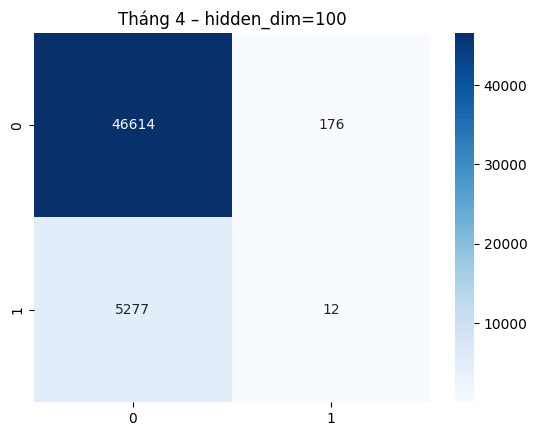


=== Dataset: Tháng 10 ===
 hidden_dim=10  → val loss = 0.693220
 hidden_dim=20  → val loss = 0.693151


/tmp/ipykernel_31/1098883462.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = -d.dot(g) / (delta + lambd*mu)
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-1

 hidden_dim=50  → val loss = 21.961906
 hidden_dim=100 → val loss = 0.693518
 hidden_dim=150 → val loss = 7.035703
 hidden_dim=17  → val loss = 0.693200
 hidden_dim=25  → val loss = 0.693346
 hidden_dim=34  → val loss = 0.693119
 hidden_dim=50  → val loss = 0.693166
 hidden_dim=68  → val loss = 5.981832
 hidden_dim=85  → val loss = 0.693224
⇒ Best hidden_dim = 34, validation loss = 0.693119
Test classification report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     57109
           1       0.00      0.00      0.00     13583

    accuracy                           0.81     70692
   macro avg       0.40      0.50      0.45     70692
weighted avg       0.65      0.81      0.72     70692

Test confusion matrix:
 [[57109     0]
 [13583     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


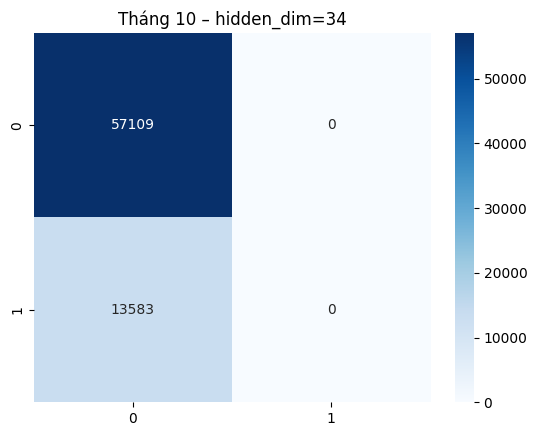

In [20]:
param_grid = {'hidden_dim': [10, 20, 50, 100, 150, 17, 25, 34, 50, 68, 85]}

for name, X_trval, y_trval, X_test, y_test in balanced_models_smote:
    print(f"\n=== Dataset: {name} ===")
    # split train+val from test
    X_train, X_val, y_train, y_val = train_test_split(
        X_trval, y_trval, test_size=0.2, random_state=42
    )
    # one-hot encode y_train
    y_arr = y_train.to_numpy().reshape(-1, 1)
    encoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train_oh = encoder.fit_transform(y_arr.reshape(-1,1))
    y_arv = y_val.to_numpy().reshape(-1, 1)
    Y_val_oh   = encoder.transform(y_arv.reshape(-1,1))
    # final test encoding not needed for training
    
    # scale assumed done before, X_trval and X_test are already scaled
    
    input_dim  = X_train.shape[1]
    output_dim = Y_train_oh.shape[1]
    
    best_h, best_loss = None, np.inf
    for h in param_grid['hidden_dim']:
        # init params
        param_size  = h*input_dim + h + output_dim*h + output_dim
        init_p = 0.01 * np.random.randn(param_size)
        # train SCG
        lg = loss_grad_factory(X_train, Y_train_oh, input_dim, h, output_dim)
        opt_p, _ = trainscg(lg, init_p, epochs=8)
        # predict on val
        W1, b1, W2, b2 = unpack(opt_p, input_dim, h, output_dim)
        Z1_val = X_val.dot(W1.T) + b1
        A1_val = np.tanh(Z1_val)
        Z2_val = A1_val.dot(W2.T) + b2
        A2_val = softmax(Z2_val)
        val_loss = -np.mean(np.sum(Y_val_oh * np.log(A2_val + 1e-12), axis=1))
        print(f" hidden_dim={h:<3} → val loss = {val_loss:.6f}")
        if val_loss < best_loss:
            best_loss, best_h = val_loss, h
    
    print(f"⇒ Best hidden_dim = {best_h}, validation loss = {best_loss:.6f}")
    
    # retrain on full train+val
    X_full = np.vstack([X_train, X_val])
    y_full = np.hstack([y_train, y_val])
    Y_full_oh = encoder.fit_transform(y_full.reshape(-1,1))
    param_size  = best_h*input_dim + best_h + output_dim*best_h + output_dim
    init_p_full = 0.01 * np.random.randn(param_size)
    lg_full = loss_grad_factory(X_full, Y_full_oh, input_dim, best_h, output_dim)
    opt_p_full, loss_hist = trainscg(lg_full, init_p_full, epochs=8)
    
    # evaluate on test
    W1f, b1f, W2f, b2f = unpack(opt_p_full, input_dim, best_h, output_dim)
    A1_test = np.tanh(X_test.dot(W1f.T) + b1f)
    probs_test = softmax(A1_test.dot(W2f.T) + b2f)
    preds_test = np.argmax(probs_test, axis=1)
    
    print("Test classification report:")
    print(classification_report(y_test, preds_test))
    cm = confusion_matrix(y_test, preds_test)
    print("Test confusion matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} – hidden_dim={best_h}")
    plt.show()

## SMOTE ENN

In [21]:
# # Dùng SMOTE + ENN
balanced_models_smoteenn = balance_datasets(models_info, method="smoteenn")


Tháng 4 - Đang cân bằng với phương pháp: SMOTEENN
Số lượng mẫu sau cân bằng: {0: 210329, 1: 218649}

Tháng 10 - Đang cân bằng với phương pháp: SMOTEENN
Số lượng mẫu sau cân bằng: {0: 200549, 1: 205165}



=== Dataset: Tháng 4 ===
 hidden_dim=10  → val loss = 0.693270
 hidden_dim=20  → val loss = 0.693112
 hidden_dim=50  → val loss = 0.693410
 hidden_dim=100 → val loss = 0.693190
 hidden_dim=150 → val loss = 0.693246
 hidden_dim=17  → val loss = 0.693012
 hidden_dim=25  → val loss = 0.693023
 hidden_dim=34  → val loss = 0.693088
 hidden_dim=50  → val loss = 0.693241
 hidden_dim=68  → val loss = 0.692927
 hidden_dim=85  → val loss = 0.693311
⇒ Best hidden_dim = 68, validation loss = 0.692927
Test classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     46790
           1       0.10      1.00      0.18      5289

    accuracy                           0.10     52079
   macro avg       0.05      0.50      0.09     52079
weighted avg       0.01      0.10      0.02     52079

Test confusion matrix:
 [[    0 46790]
 [    0  5289]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


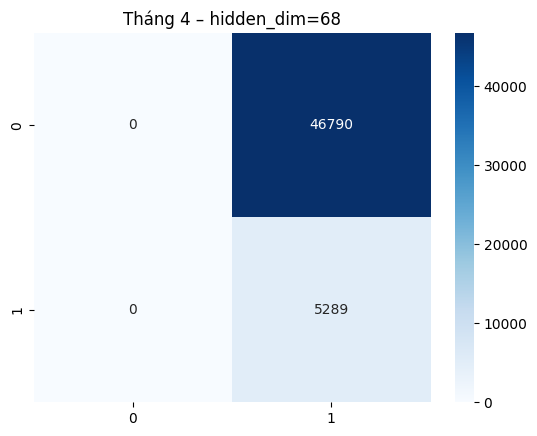


=== Dataset: Tháng 10 ===
 hidden_dim=10  → val loss = 0.693212
 hidden_dim=20  → val loss = 0.693092
 hidden_dim=50  → val loss = 0.693478
 hidden_dim=100 → val loss = 0.693192
 hidden_dim=150 → val loss = 0.693222
 hidden_dim=17  → val loss = 0.693137
 hidden_dim=25  → val loss = 0.693105


/tmp/ipykernel_31/1098883462.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = -d.dot(g) / (delta + lambd*mu)
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))
/tmp/ipykernel_31/1098883462.py:89: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(np.sum(Y_oh * np.log(A2 + 1e-12), axis=1))


 hidden_dim=34  → val loss = 4.262611
 hidden_dim=50  → val loss = 0.693223
 hidden_dim=68  → val loss = 0.693219
 hidden_dim=85  → val loss = 0.693351
⇒ Best hidden_dim = 20, validation loss = 0.693092
Test classification report:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57     57109
           1       0.06      0.15      0.09     13583

    accuracy                           0.41     70692
   macro avg       0.38      0.31      0.33     70692
weighted avg       0.58      0.41      0.48     70692

Test confusion matrix:
 [[27276 29833]
 [11613  1970]]


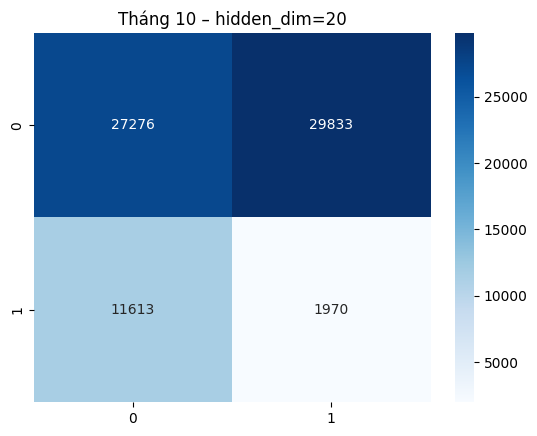

In [22]:
param_grid = {'hidden_dim': [10, 20, 50, 100, 150, 17, 25, 34, 50, 68, 85]}

for name, X_trval, y_trval, X_test, y_test in balanced_models_smoteenn:
    print(f"\n=== Dataset: {name} ===")
    # split train+val from test
    X_train, X_val, y_train, y_val = train_test_split(
        X_trval, y_trval, test_size=0.2, random_state=42
    )
    # one-hot encode y_train
    y_arr = y_train.to_numpy().reshape(-1, 1)
    encoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train_oh = encoder.fit_transform(y_arr.reshape(-1,1))
    y_arv = y_val.to_numpy().reshape(-1, 1)
    Y_val_oh   = encoder.transform(y_arv.reshape(-1,1))
    # final test encoding not needed for training
    
    # scale assumed done before, X_trval and X_test are already scaled
    
    input_dim  = X_train.shape[1]
    output_dim = Y_train_oh.shape[1]
    
    best_h, best_loss = None, np.inf
    for h in param_grid['hidden_dim']:
        # init params
        param_size  = h*input_dim + h + output_dim*h + output_dim
        init_p = 0.01 * np.random.randn(param_size)
        # train SCG
        lg = loss_grad_factory(X_train, Y_train_oh, input_dim, h, output_dim)
        opt_p, _ = trainscg(lg, init_p, epochs=8)
        # predict on val
        W1, b1, W2, b2 = unpack(opt_p, input_dim, h, output_dim)
        Z1_val = X_val.dot(W1.T) + b1
        A1_val = np.tanh(Z1_val)
        Z2_val = A1_val.dot(W2.T) + b2
        A2_val = softmax(Z2_val)
        val_loss = -np.mean(np.sum(Y_val_oh * np.log(A2_val + 1e-12), axis=1))
        print(f" hidden_dim={h:<3} → val loss = {val_loss:.6f}")
        if val_loss < best_loss:
            best_loss, best_h = val_loss, h
    
    print(f"⇒ Best hidden_dim = {best_h}, validation loss = {best_loss:.6f}")
    
    # retrain on full train+val
    X_full = np.vstack([X_train, X_val])
    y_full = np.hstack([y_train, y_val])
    Y_full_oh = encoder.fit_transform(y_full.reshape(-1,1))
    param_size  = best_h*input_dim + best_h + output_dim*best_h + output_dim
    init_p_full = 0.01 * np.random.randn(param_size)
    lg_full = loss_grad_factory(X_full, Y_full_oh, input_dim, best_h, output_dim)
    opt_p_full, loss_hist = trainscg(lg_full, init_p_full, epochs=8)
    
    # evaluate on test
    W1f, b1f, W2f, b2f = unpack(opt_p_full, input_dim, best_h, output_dim)
    A1_test = np.tanh(X_test.dot(W1f.T) + b1f)
    probs_test = softmax(A1_test.dot(W2f.T) + b2f)
    preds_test = np.argmax(probs_test, axis=1)
    
    print("Test classification report:")
    print(classification_report(y_test, preds_test))
    cm = confusion_matrix(y_test, preds_test)
    print("Test confusion matrix:\n", cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} – hidden_dim={best_h}")
    plt.show()